In [1]:
from google.colab import drive
import os
import shutil
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers
from keras import models
from keras import optimizers
from keras.layers import Input, Dense, Activation, Flatten, Conv2D
from keras.layers import MaxPooling2D, Dropout, ZeroPadding2D, BatchNormalization
from keras.models import Model, load_model
from keras.preprocessing.image import ImageDataGenerator, image
tf.test.gpu_device_name()

Using TensorFlow backend.


'/device:GPU:0'

# Data Preparing

In [0]:

original_dataset_dir = '/content/drive/My Drive/Colab Notebooks/Chest_Xray/DATA' 

base_dir = '/content/Chest_Xray'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

test_dir = os.path.join(base_dir, 'test') 
os.mkdir(test_dir)

train_Normal_dir = os.path.join(train_dir, 'Normal')
os.mkdir(train_Normal_dir)

train_Sick_dir = os.path.join(train_dir, 'Sick')
os.mkdir(train_Sick_dir)

test_Normal_dir = os.path.join(test_dir, 'Normal')
os.mkdir(test_Normal_dir)

test_Sick_dir = os.path.join(test_dir, 'Sick')
os.mkdir(test_Sick_dir)


fnames = ['Normal.{}.jpeg'.format(i) for i in range(1341)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_Normal_dir, fname)
  shutil.copyfile(src, dst)


fnames = ['Normal.{}.jpeg'.format(i) for i in range(1341, 1574)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_Normal_dir, fname)
  shutil.copyfile(src, dst)

  fnames = ['Sick.{}.jpeg'.format(i) for i in range(3874)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_Sick_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['Sick.{}.jpeg'.format(i) for i in range(3874, 4264)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_Sick_dir, fname)
  shutil.copyfile(src, dst)



In [3]:
print('total training Normal images:', len(os.listdir(train_Normal_dir)))
print('total training Sick images:', len(os.listdir(train_Sick_dir)))
print('total test Normal images:', len(os.listdir(test_Normal_dir)))
print('total test Sick images:', len(os.listdir(test_Sick_dir)))

total training Normal images: 1341
total training Sick images: 3874
total test Normal images: 233
total test Sick images: 390


In [80]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    class_mode = 'binary',
    color_mode="grayscale",
    target_size = (200, 200),
    batch_size = 16)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    class_mode = 'binary',
    color_mode="grayscale",
    target_size = (200, 200),
    batch_size = 16)




Found 5215 images belonging to 2 classes.
Found 623 images belonging to 2 classes.


In [81]:
for data_batch, labels_batch in train_generator:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  break

data batch shape: (16, 200, 200, 1)
labels batch shape: (16,)


# Model Creation and Assigning.

In [0]:
def xray(input_shape):

  #Placeholding for the X_input.
  X_input = Input(input_shape)
    
  X = X_input

  # (Conv2d + BN + Dropout + MaxPooling) X 10
  X = Conv2D(32, (3, 3), input_shape=(200, 200, 1), padding = "same")(X)
  X = BatchNormalization(axis = -1)(X)
  X = Activation('relu')(X)
  X = Dropout(0.6)(X)
  X = MaxPooling2D((2, 2))(X)

  X = Conv2D(32, (3, 3), padding = "same")(X)
  X = BatchNormalization(axis = -1)(X)
  X = Activation('relu')(X)
  X = Dropout(0.6)(X)
  X = MaxPooling2D((2, 2))(X)

  X = Conv2D(64, (3, 3), padding = "same")(X)
  X = BatchNormalization(axis = -1)(X)
  X = Activation('relu')(X)
  X = Dropout(0.6)(X)
  X = MaxPooling2D((2, 2))(X)

  X = Conv2D(64, (3, 3), padding = "same")(X)
  X = BatchNormalization(axis = -1)(X)
  X = Activation('relu')(X)
  X = Dropout(0.6)(X)
  X = MaxPooling2D((2, 2))(X)

  X = Conv2D(128, (3, 3), padding = "same")(X)
  X = BatchNormalization(axis = -1)(X)
  X = Activation('relu')(X)
  X = Dropout(0.6)(X)
  X = MaxPooling2D((2, 2))(X) 

  
  X = Conv2D(128, (3, 3), padding = "same")(X)
  X = BatchNormalization(axis = -1)(X)
  X = Activation('relu')(X)
  X = Dropout(0.5)(X)
  X = MaxPooling2D((2, 2), padding = "same")(X)
  
  X = Conv2D(256, (3, 3), padding = "same")(X)
  X = BatchNormalization(axis = -1)(X)
  X = Activation('relu')(X)
  X = Dropout(0.5)(X)
  X = MaxPooling2D((2, 2), padding = "same")(X)

  X = Conv2D(256, (3, 3), padding = "same")(X)
  X = BatchNormalization(axis = -1)(X)
  X = Activation('relu')(X)
  X = Dropout(0.5)(X)
  X = MaxPooling2D((2, 2), padding = "same")(X)
  
  X = Conv2D(512, (3, 3), padding = "same")(X)
  X = BatchNormalization(axis = -1)(X)
  X = Activation('relu')(X)
  X = Dropout(0.5)(X)
  X = MaxPooling2D((2, 2), padding = "same")(X)  

  X = Conv2D(512, (3, 3), padding = "same")(X)
  X = BatchNormalization(axis = -1)(X)
  X = Activation('relu')(X)
  X = Dropout(0.5)(X)
  X = MaxPooling2D((2, 2), padding = "same")(X)
  
  X = Flatten()(X)

  # FC + Dropout X2
  X = Dense(16, activation = 'relu')(X)
  X = Dropout(0.4)(X)

  X = Dense(32, activation = 'relu')(X)
  X = Dropout(0.3)(X)

  #Sigmoid activation
  X = Dense(1, activation = 'sigmoid')(X)

  #Model creation
  model = Model(inputs = X_input, outputs = X, name='xray')

  return model

In [0]:
Xray = xray(input_shape = (200, 200, 1)) #Assigning the model

# Model Compileing, Training, and Testing

In [0]:
Xray.compile(loss = 'binary_crossentropy', 
              optimizer = 'Adam',
              metrics = ['acc']) 

In [69]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size #Determining the step size == (number of samples)/(batch size)

Xray.fit_generator(generator=train_generator,                # Model training
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    epochs = 30)

Epoch 1/30
325/325 [==============================] - 46s 142ms/step - loss: 0.4278 - acc: 0.7825
Epoch 2/30
325/325 [==============================] - 46s 143ms/step - loss: 0.2560 - acc: 0.8932
Epoch 3/30
325/325 [==============================] - 47s 144ms/step - loss: 0.2290 - acc: 0.9200
Epoch 4/30
325/325 [==============================] - 47s 145ms/step - loss: 0.1921 - acc: 0.9359
Epoch 5/30
325/325 [==============================] - 48s 146ms/step - loss: 0.1773 - acc: 0.9400
Epoch 6/30
325/325 [==============================] - 48s 147ms/step - loss: 0.1674 - acc: 0.9454
Epoch 7/30
325/325 [==============================] - 48s 147ms/step - loss: 0.1637 - acc: 0.9461
Epoch 8/30
325/325 [==============================] - 48s 146ms/step - loss: 0.1451 - acc: 0.9519
Epoch 9/30
325/325 [==============================] - 48s 148ms/step - loss: 0.1635 - acc: 0.9481
Epoch 10/30
325/325 [==============================] - 48s 147ms/step - loss: 0.1376 - acc: 0.9538
Epoch 11/30
325/325

In [70]:
STEP_SIZE_TEST = test_generator.n//test_generator.batch_size #Determining the step size == (number of samples)/(batch size)

test_generator.reset()

pred = Xray.predict_generator(test_generator,        # Model Evaluation
steps=STEP_SIZE_TEST,
verbose=1)

print ("Loss = " + str(pred[0]))
print ("Test Accuracy = " + str(pred[1]))

38/38 [==============================] - 4s 116ms/step
Loss = [0.99991095]
Test Accuracy = [0.99990225]


# Model Saving, Loading, and Summrizing.

In [0]:
Xray.save('Xray,h5') #Saving the weights of the model as an h5 file.

In [0]:
Xray = load_model('') # Only if there is already a trained model !

In [84]:
Xray.summary() 

Model: "xray"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 200, 200, 1)       0         
_________________________________________________________________
conv2d_103 (Conv2D)          (None, 200, 200, 32)      320       
_________________________________________________________________
batch_normalization_81 (Batc (None, 200, 200, 32)      128       
_________________________________________________________________
activation_99 (Activation)   (None, 200, 200, 32)      0         
_________________________________________________________________
dropout_115 (Dropout)        (None, 200, 200, 32)      0         
_________________________________________________________________
max_pooling2d_99 (MaxPooling (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_104 (Conv2D)          (None, 100, 100, 32)      9248   

# Test Your Own Images :)

In [86]:
from google.colab import files        #Test your own images ! 
uploaded = files.upload()             #Upload an image from your dir.

for name, data in uploaded.items():
  with open(name, 'wb') as f:
    f.write(data)
    print ('saved file', name)

Saving datasets_17810_23812_chest_xray_val_PNEUMONIA_person1947_bacteria_4876.jpeg to datasets_17810_23812_chest_xray_val_PNEUMONIA_person1947_bacteria_4876.jpeg
saved file datasets_17810_23812_chest_xray_val_PNEUMONIA_person1947_bacteria_4876.jpeg


The patient is Pneumonia positive !


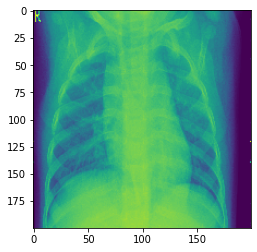

In [92]:
from matplotlib.pyplot import imshow
from keras.applications.imagenet_utils import preprocess_input

img_path = '/content/' + name          #Uncomment if you want to use the image uploded by the previous cell.
#img_path = '/content/' + '350' + '.jpg' #Uncomment if you want to choose the image manually.

img = image.load_img(img_path, color_mode='grayscale', target_size=(200, 200))

imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

if Xray.predict(x) == 0 :
  print("The patient is Pneumonia negtive")
else :
  print("The patient is Pneumonia positive !")